In [5]:
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import pandas as pd

from utils import format_tweet_data_frame, plot_sentiment_distribution

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [6]:
unzipped_tweet_file_names = ['2017_Arabic_train_final.zip', '2017_English_final.zip']

In [7]:
def unzip_tweet_files(tweet_file_names):
    root_file_path = "data/raw"
    for file_name in tweet_file_names:
        local_zip = f"{root_file_path}/{file_name}"
        print(f"extracting files in {local_zip}")        
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(root_file_path)
        zip_ref.close()

In [8]:
# unzip_tweet_files(unzipped_tweet_file_names)

extracting files in data/raw/2017_Arabic_train_final.zip
extracting files in data/raw/2017_English_final.zip


In [9]:
en_tweets_root_path = "data/raw/2017_English_final/GOLD/Subtask_A"
ar_tweets_root_path = "data/raw/2017_Arabic_train_final/GOLD"

en_train_tweets_files = ["twitter-2013train-A.txt", "twitter-2014sarcasm-A.txt", "twitter-2015train-A.txt", "twitter-2016train-A.txt"]
en_test_tweets_files = ["twitter-2013test-A.txt", "twitter-2014test-A.txt", "twitter-2015test-A.txt", "twitter-2016test-A.txt"]

ar_test_tweets_files = ["SemEval2017-task4-train.subtask-A.arabic.txt"]

positive    6847
neutral     6847
negative    2396
Name: 1, dtype: int64


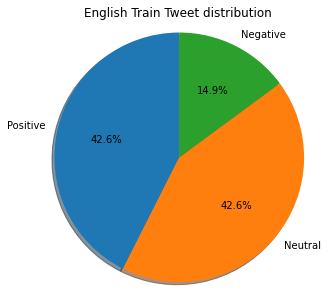

In [10]:
en_train_tweet_df = format_tweet_data_frame(en_tweets_root_path, en_train_tweets_files)
values = en_train_tweet_df[1].value_counts()
print(values)
num_positive_tweets = values.iloc[0]
num_neutral_tweets = values.iloc[1]
num_negative_tweets = values.iloc[2]
plot_sentiment_distribution(num_positive_tweets, num_neutral_tweets, num_negative_tweets, "English Train Tweet distribution")

In [11]:
en_train_tweet_df.head()

,0,1,2,processed_tweet
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,gas house hit $ 3.39 i\u2019 m going chapel hi...
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,theo walcott shit\u002c watch rafa johnny deal...
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,i\u2019 m gsp fan\u002c hate nick diaz can\u20...
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,iranian general says israel\u2019s iron dome c...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,tehran\u002c mon amour obama tried establish t...


neutral     13511
positive    10554
negative     4357
Name: 1, dtype: int64


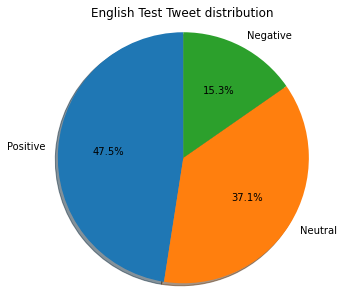

In [12]:
en_test_tweet_df = format_tweet_data_frame(en_tweets_root_path, en_test_tweets_files)
values = en_test_tweet_df[1].value_counts()
print(values)
num_positive_tweets = values.iloc[0]
num_neutral_tweets = values.iloc[1]
num_negative_tweets = values.iloc[2]
plot_sentiment_distribution(num_positive_tweets, num_neutral_tweets, num_negative_tweets, "English Test Tweet distribution")

neutral     1470
negative    1141
positive     742
Name: 1, dtype: int64


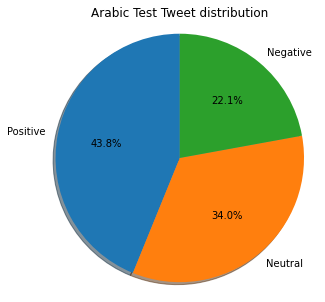

In [13]:
ar_test_tweet_df = format_tweet_data_frame(ar_tweets_root_path, ar_test_tweets_files)
values = ar_test_tweet_df[1].value_counts()
print(values)
num_positive_tweets = values.iloc[0]
num_neutral_tweets = values.iloc[1]
num_negative_tweets = values.iloc[2]
plot_sentiment_distribution(num_positive_tweets, num_neutral_tweets, num_negative_tweets, "Arabic Test Tweet distribution")

In [15]:
ar_test_tweet_df.head()

,0,1,2,processed_tweet
0,783555835494592513,positive,إجبار أبل على التعاون على فك شفرة اجهزتها http...,إجبار أبل على التعاون على فك شفرة اجهزتها
1,783582397166125056,positive,RT @20fourMedia: #غوغل تتحدى أبل وأمازون بأجهز...,غوغل تتحدى أبل وأمازون بأجهزة جديدة
2,783592390728769536,positive,جوجل تنافس أبل وسامسونج بهاتف جديد https://t.c...,جوجل تنافس أبل وسامسونج بهاتف جديد
3,783597390070685696,positive,رئيس شركة أبل: الواقع المعزز سيصبح أهم من الطع...,رئيس شركة أبل الواقع المعزز سيصبح أهم من الطعام
4,783617442031472640,neutral,ساعة أبل في الأسواق مرة أخرى https://t.co/dY2x...,ساعة أبل في الأسواق مرة أخرى


In [17]:
ar_test_tweet_df.columns = ['id', 'sentiment', 'original', 'preprocessed']
ar_test_tweet_df.to_csv('data/preprocessed/arabic/arabic_test_tweets.csv', index=False)

In [28]:
en_train_tweet_df.columns = ['id', 'sentiment', 'original', 'preprocessed']
# en_test_tweet_df.drop(columns=[3]) # uncomment if running from the top
en_test_tweet_df.columns = ['id', 'sentiment', 'original', 'preprocessed']

en_train_tweet_df.to_csv('data/preprocessed/english/english_train_tweets.csv', index=False)
en_test_tweet_df.to_csv('data/preprocessed/english/english_test_tweets.csv', index=False)
